In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import pandas as pd
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
test = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment5/data_k_mean.txt',sep=' ', header = None)
test


,0,1
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


In [ ]:
x = []
y = []
for i in range(len(test)):
    x.append(test[0][i])
    y.append(test[1][i])
print(x)
print(y)

[-7.871569999999999, -4.76661, -6.679860000000001, -8.93021, -7.91375, 5.8628800000000005, -7.6157, 8.07681, 5.76394, -5.0452699999999995, -5.9452300000000005, 7.682289999999999, -7.164510000000001, -5.52871, -5.1576699999999995, -6.580769999999999, 6.9194, -6.638330000000001, 7.84315, -8.62059, 7.7138100000000005, 7.55081, -6.12205, -8.524189999999999, -6.611739999999999, 5.96309, -5.489, -7.88635, -6.94976, -8.632539999999999, -5.89133, -5.55773, -9.971119999999999, 8.43324, 7.60951, -6.03485, -5.24465, -6.2337, -7.34628, 7.75075, -6.27746, -4.958419999999999, -6.972910000000001, 7.523639999999999, 7.4995199999999995, -6.787439999999999, -7.7761, 6.38471, 7.012160000000001, -8.452639999999999, 6.8319399999999995, -7.0763300000000005, -7.6902800000000004, -6.08345, 7.942069999999999, -5.91793, -8.442969999999999, -6.2914, -7.491680000000001, 8.041160000000001, -6.4612099999999995, -6.81407, -8.792810000000001, -8.093210000000001, -6.41933, -4.62398, -8.25562, -7.95317, 5.87246, -4.667

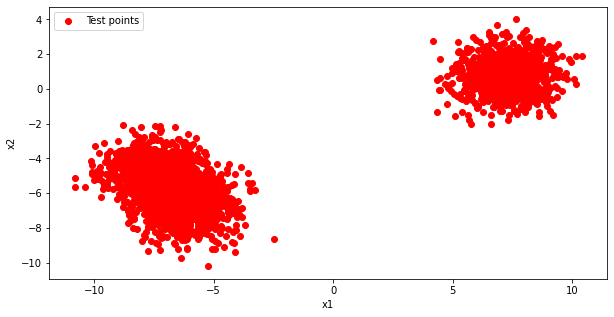

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'or' , label = 'Test points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
k = int(input('Enter value of K: '))
k

Enter value of K: 2


2

In [ ]:
df = pd.DataFrame({'x': x,'y': y})
df

,x,y
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


In [ ]:
import random
init_centroids = random.sample(range(0, len(test)), k)
init_centroids

[360, 2920]

In [ ]:
centroids = []
for i in init_centroids:
    centroids.append(test.loc[i])
print(centroids)


[0    8.2648
1    0.2306
Name: 360, dtype: float64, 0   -6.39068
1   -7.13519
Name: 2920, dtype: float64]


In [ ]:
centroids = pd.DataFrame(data = {'x': [centroids[0][0],centroids[1][0]], 'y': [centroids[0][1],centroids[1][1]]})
centroids

,x,y
0,8.26480,0.23060
1,-6.39068,-7.13519


In [ ]:
def calc_distance(row1, row2):
    dist = np.sqrt(((row1['x'] - row2['x'])**2) + ((row1['y'] - row2['y'])**2))
    return dist

In [ ]:
change = True

while(change == True):
    data=df

    for idx,row_c in centroids.iterrows():
        ED=[]
        for idx2,row_d in data.iterrows():
            d = calc_distance(row_c,row_d)

    cluster=[]
    for index,row in df.iterrows():
        min_dist = row[1]
        c = 1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                c = i+1
        cluster.append(c)
    df["Cluster"] = cluster
    c_new = df.groupby(["Cluster"]).mean()[["x","y"]]
    check = (c_new['x'] - centroids['x']).sum() + (c_new['y'] - centroids['y']).sum()
    if (check == 0 ):
      change = False
    centroids = df.groupby(["Cluster"]).mean()[["x","y"]]

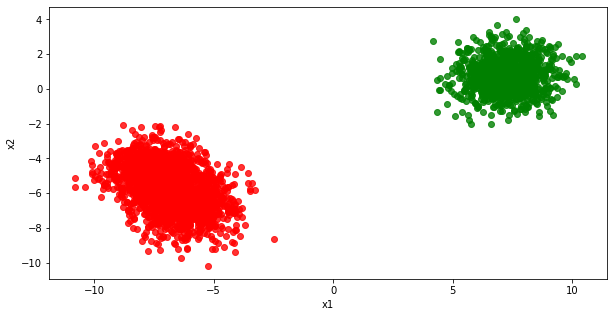

In [ ]:
plt.figure(figsize=(10,5))
color=['red','green']
for i in range(k):
    plot =X[X["Cluster"] == i+1]
    plt.scatter(plot["x"],plot["y"],c=color[i],alpha = 0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()